Linear Regression Template with minimum changes.

Configuration Section (User-Editable Block)

In [56]:
DATA_PATH = '/content/drive/MyDrive/archive/train.csv'  # path to your dataset
TARGET_COLUMN = 'Loan Amount Request (USD)'             # your prediction target column

NUMERICAL_COLS = [
    'Age', 'Income (USD)', 'Loan Amount Request (USD)',
    'Current Loan Expenses (USD)', 'Credit Score',
    'No. of Defaults', 'Property Age', 'Property Price'
]

CATEGORICAL_COLS = [
    'Gender', 'Income Stability', 'Profession', 'Type of Employment',
    'Location', 'Expense Type 1', 'Expense Type 2', 'Dependents',
    'Has Active Credit Card', 'Property ID', 'Property Type',
    'Property Location', 'Co-Applicant'
]

DROP_COLS = ['Customer ID', 'Name']


1) Load Dataset

In [57]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/archive/train.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


2) Process the Data

In [58]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64


2.1) Handle Missing Values

In [59]:
for col in NUMERICAL_COLS:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())

for col in CATEGORICAL_COLS:
    df[col] = df[col].fillna(df[col].mode()[0])

df = df.dropna()
print("\nAfter filling, missing values per column:")
print(df.isnull().sum())


After filling, missing values per column:
Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64


2.2) Encode Categorical Variables

In [60]:
df_encoded = pd.get_dummies(df, columns=CATEGORICAL_COLS)
print("New shape before encoding:", df.shape)
print("New shape after encoding:", df_encoded.shape)
df_encoded_clean = df_encoded.copy()

for col in df_encoded_clean.columns:
    if df_encoded_clean[col].dtype == 'object':
        print(f"Dropping non-numeric column: {col}")
        df_encoded_clean = df_encoded_clean.drop(columns=[col])


New shape before encoding: (29660, 24)
New shape after encoding: (29660, 1070)
Dropping non-numeric column: Customer ID
Dropping non-numeric column: Name


2.3) Standardize Numerical Features

In [61]:
df_encoded_clean = df_encoded.drop(columns=DROP_COLS)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = pd.DataFrame(
    scaler.fit_transform(df_encoded_clean),
    columns=df_encoded_clean.columns
)
print(df_standardized.head())

        Age  Income (USD)  Loan Amount Request (USD)  \
0  0.990718     -0.060998                  -0.268703   
1 -0.504632      0.228612                  -0.705356   
2  1.551474     -0.151612                  -0.726278   
3  1.551474     -0.033246                  -0.146842   
4 -0.566939      0.004380                   0.421433   

   Current Loan Expenses (USD)  Credit Score  No. of Defaults  Property Age  \
0                    -0.660921      0.992841        -0.490710     -0.060691   
1                     0.393487      0.578518        -0.490710      0.228949   
2                    -0.947071      1.331119        -0.490710     -0.151314   
3                    -0.423076      1.324699         2.037863     -0.032857   
4                     0.375274      0.081301         2.037863      0.004694   

   Property Price  Loan Sanction Amount (USD)  Gender_F  ...  Property Type_1  \
0       -0.126312                    0.144293  1.007581  ...        -0.596146   
1       -0.823622         

3) Exploratory Data Analysis (EDA)

3.1) Histogram

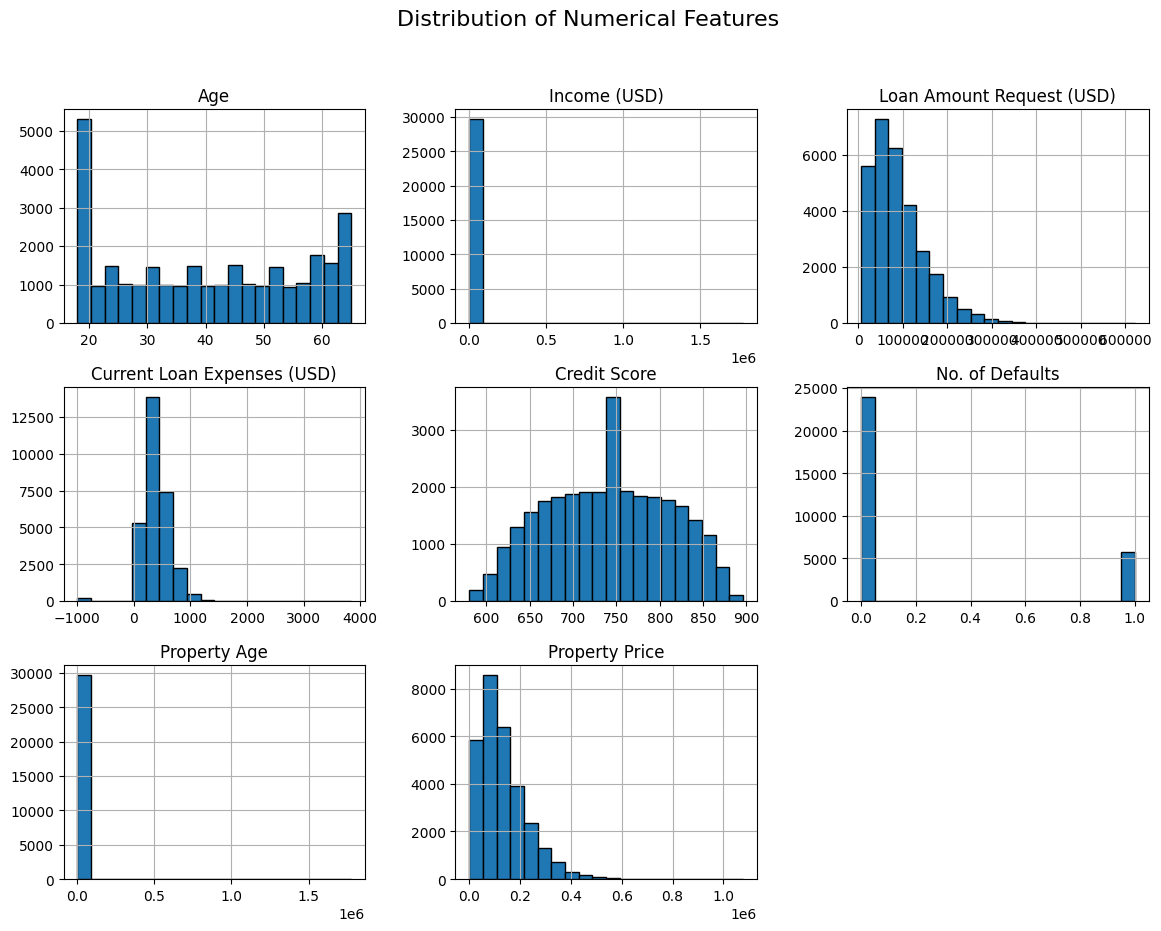

In [62]:
import matplotlib.pyplot as plt

df[NUMERICAL_COLS].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

3.2) Scatter Plots

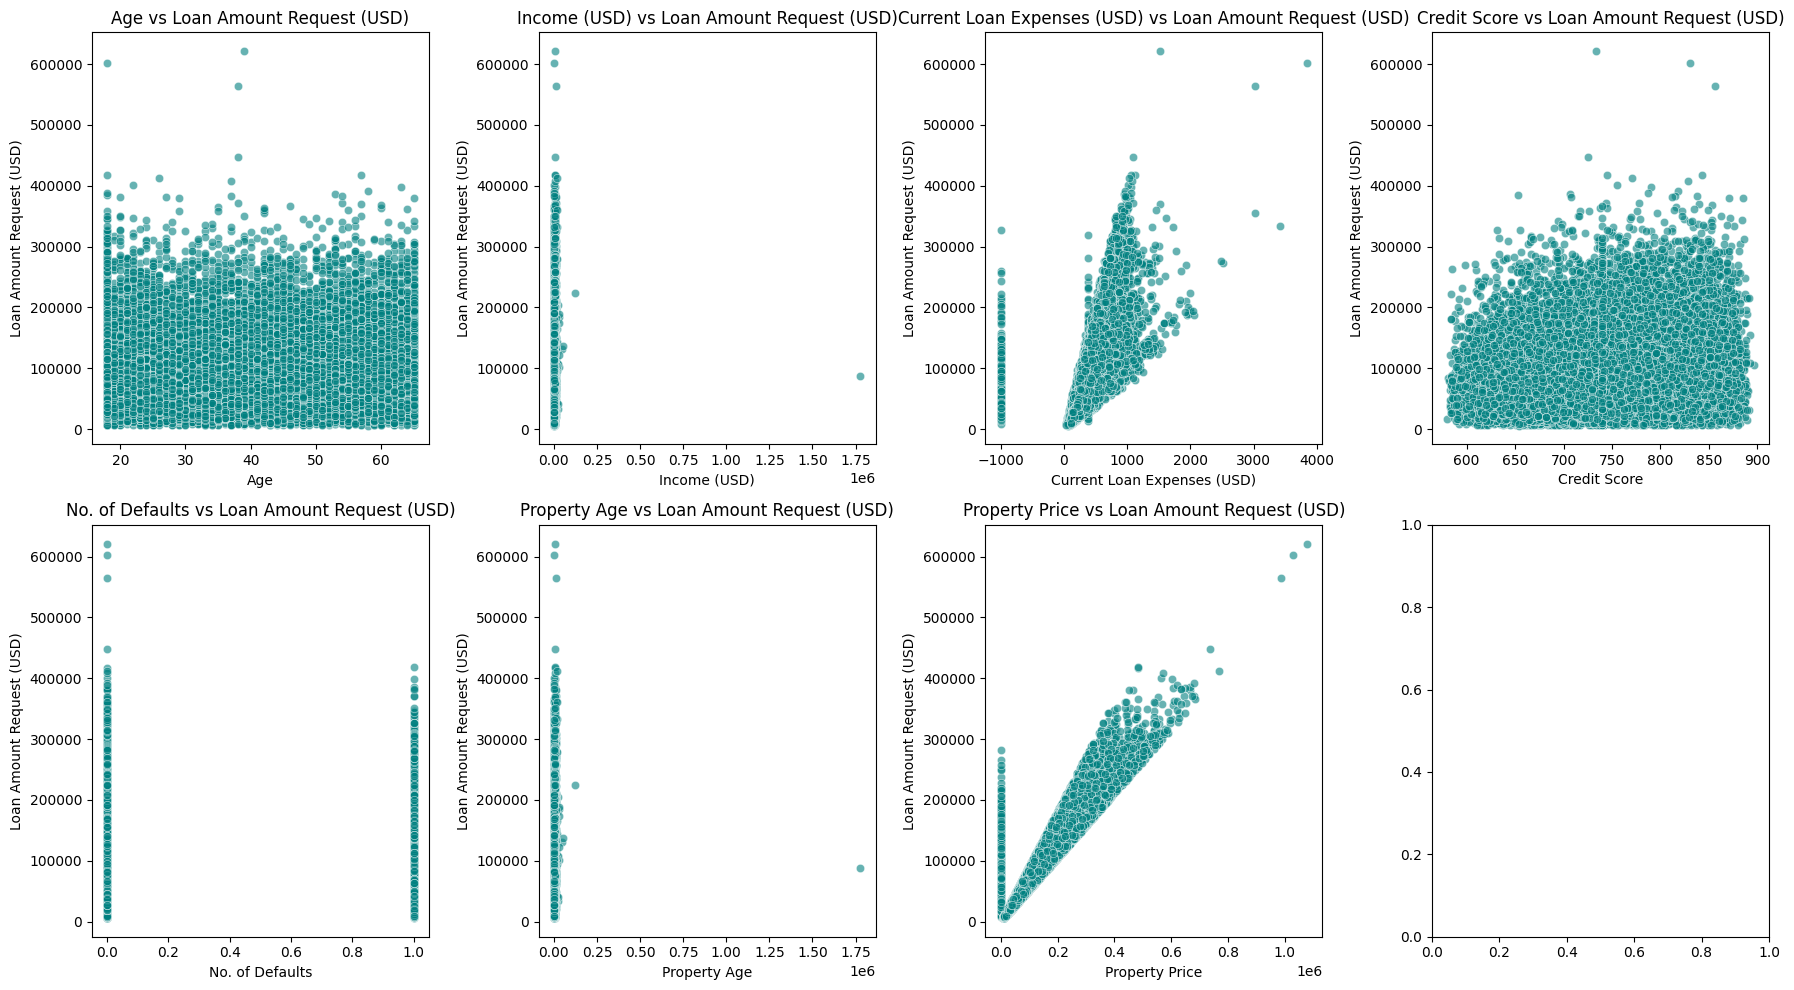

In [32]:
import seaborn as sns

target = TARGET_COLUMN
features = [col for col in NUMERICAL_COLS if col != target]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()
for i, col in enumerate(features):
    sns.scatterplot(ax=axes[i], x=df[col], y=df[target], alpha=0.6, color='teal')
    axes[i].set_title(f'{col} vs {target}')
plt.tight_layout()
plt.show()

3.3) Correlation Heatmap

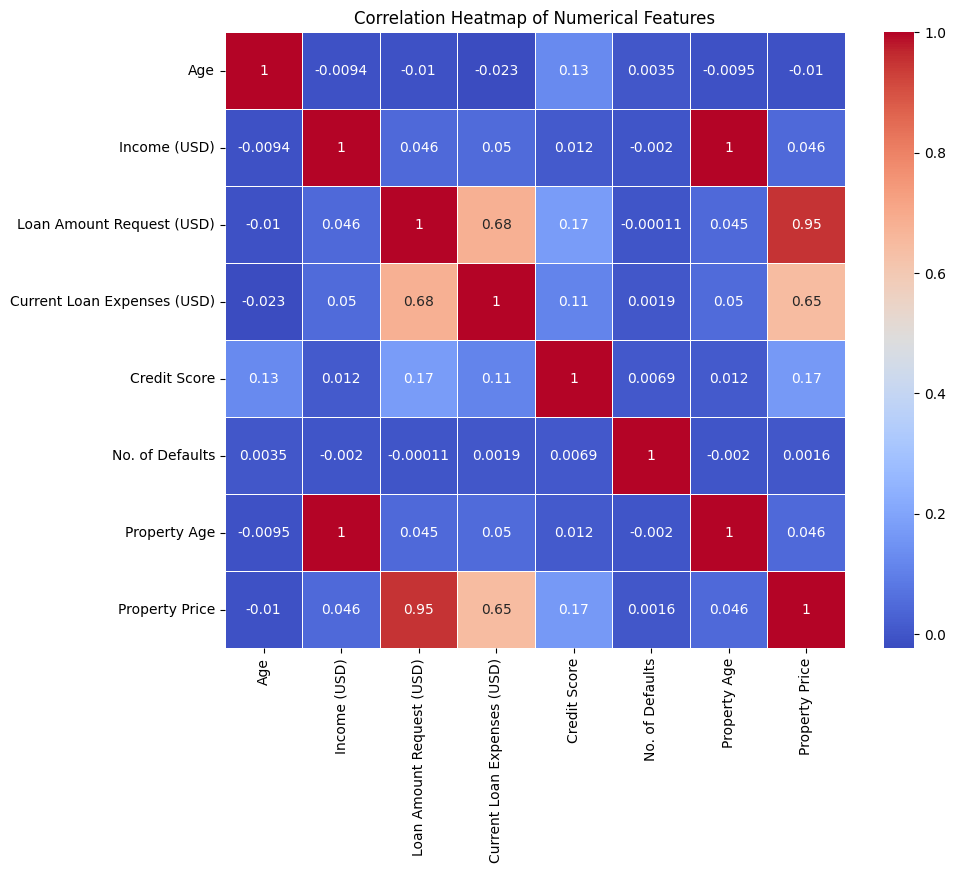

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[NUMERICAL_COLS].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

4) Dataset Splitting

In [63]:
df_encoded = pd.get_dummies(df, columns=CATEGORICAL_COLS)

df_encoded_clean = df_encoded.copy()
for col in df_encoded_clean.columns:
    if df_encoded_clean[col].dtype == 'object':
        print(f"Dropping non-numeric column: {col}")
        df_encoded_clean = df_encoded_clean.drop(columns=[col])

from sklearn.model_selection import train_test_split

X = df_encoded_clean.drop(columns=[TARGET_COLUMN])
y = df_encoded_clean[TARGET_COLUMN]

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

print(f"Train: {X_train.shape}")
print(f"Validation: {X_val.shape}")
print(f"Test: {X_test.shape}")


Dropping non-numeric column: Customer ID
Dropping non-numeric column: Name
Train: (17796, 1067)
Validation: (5932, 1067)
Test: (5932, 1067)


5) Train Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

✅ Model trained successfully!


6) Predict and Display

In [65]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print("\nValidation set: Actual vs Predicted")
for actual, pred in zip(y_val[:10], y_val_pred[:10]):
    print(f"Actual: {actual:.2f} | Predicted: {pred:.2f}")

print("\nTest set: Actual vs Predicted")
for actual, pred in zip(y_test[:10], y_test_pred[:10]):
    print(f"Actual: {actual:.2f} | Predicted: {pred:.2f}")


Validation set: Actual vs Predicted
Actual: 26009.17 | Predicted: 24728.89
Actual: 132855.64 | Predicted: 140259.14
Actual: 136882.87 | Predicted: 141439.14
Actual: 185046.68 | Predicted: 184234.87
Actual: 151344.83 | Predicted: 167881.03
Actual: 89733.04 | Predicted: 64844.73
Actual: 92008.74 | Predicted: 101362.08
Actual: 38795.02 | Predicted: 23832.61
Actual: 61810.46 | Predicted: 76261.91
Actual: 28732.23 | Predicted: 32829.69

Test set: Actual vs Predicted
Actual: 84001.94 | Predicted: 73353.20
Actual: 77944.47 | Predicted: 82676.61
Actual: 14015.89 | Predicted: 26616.80
Actual: 122439.74 | Predicted: 110892.34
Actual: 55111.86 | Predicted: 52946.30
Actual: 150026.87 | Predicted: 155572.39
Actual: 19640.68 | Predicted: 28936.22
Actual: 26181.02 | Predicted: 35009.54
Actual: 16673.81 | Predicted: 24130.23
Actual: 52890.77 | Predicted: 42949.15


7) Model Performance

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred, name=''):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n✅ {name} Metrics:")
    print(f"MAE:  {mae:.2f}")
    print(f"MSE:  {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.4f}")

evaluate(y_val, y_val_pred, "Validation Set")
evaluate(y_test, y_test_pred, "Test Set")


✅ Validation Set Metrics:
MAE:  12081.39
MSE:  321349783.60
RMSE: 17926.23
R²:   0.9097

✅ Test Set Metrics:
MAE:  12157.64
MSE:  323986116.41
RMSE: 17999.61
R²:   0.9099


8) Visualization

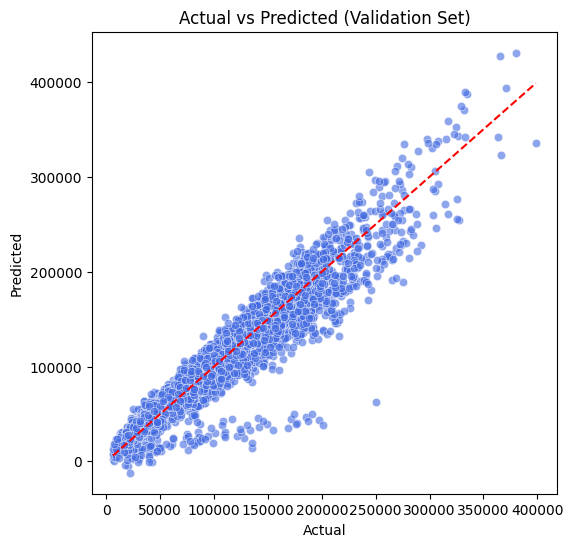

In [47]:
# 9.1 Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6, color='royalblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Validation Set)')
plt.show()

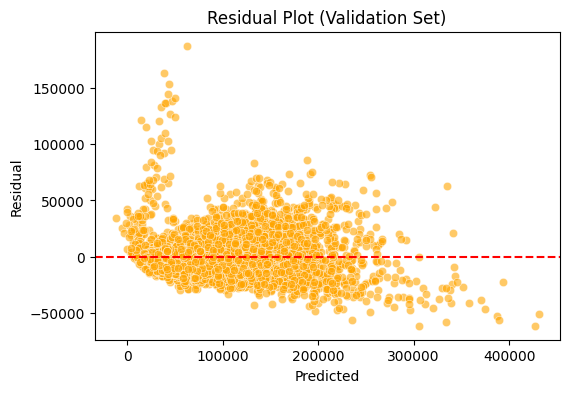

In [48]:
# 9.2 Residuals
residuals_val = y_val - y_val_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_val_pred, y=residuals_val, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residual Plot (Validation Set)')
plt.show()

/tmp/ipython-input-49-1060495321.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coef_df, x='Coefficient', y='Feature', palette='viridis')


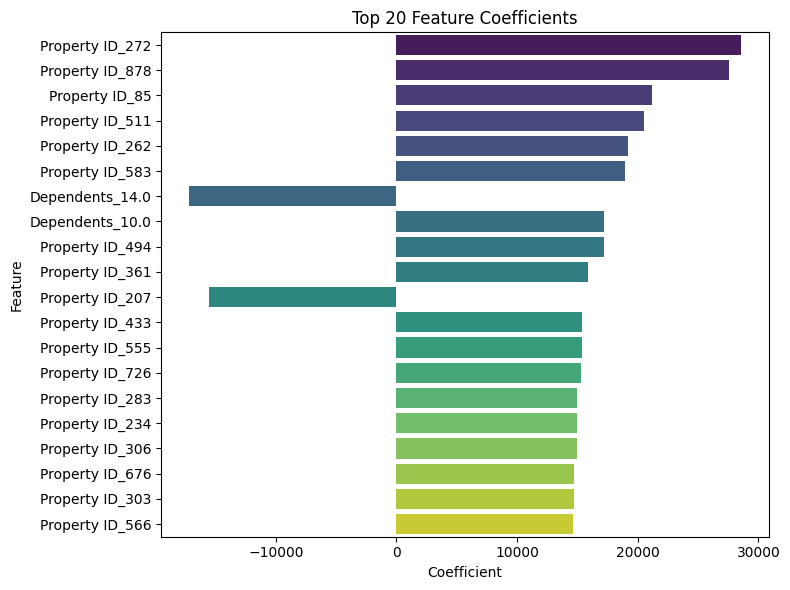

In [49]:
# 9.3 Feature Coefficients
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
top_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(data=top_coef_df, x='Coefficient', y='Feature', palette='viridis')
plt.title('Top 20 Feature Coefficients')
plt.tight_layout()
plt.show()

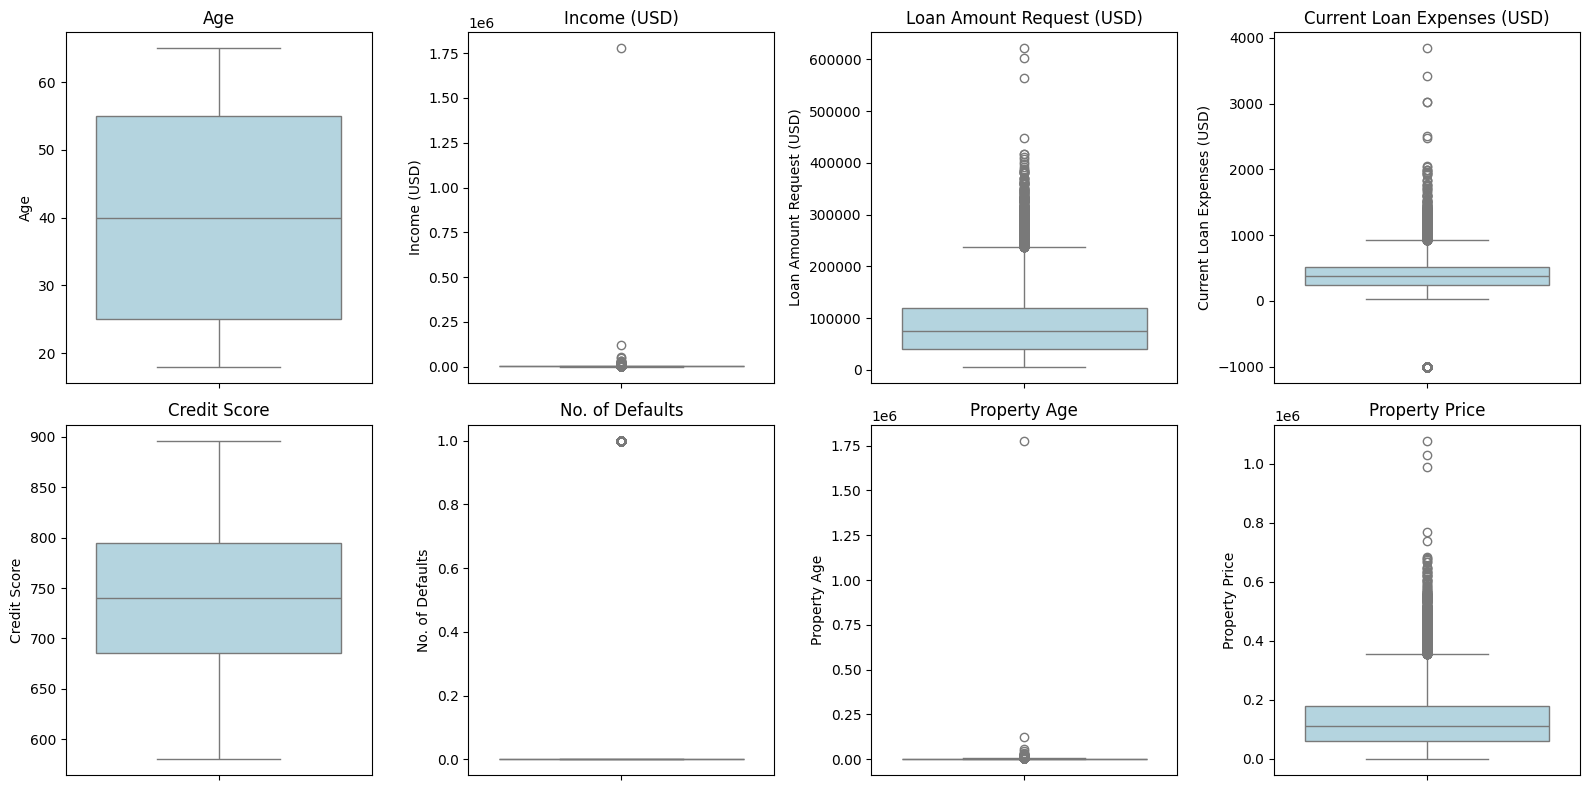

In [50]:
# 9.4 Boxplots of numerical features
plt.figure(figsize=(16,8))
for i, col in enumerate(NUMERICAL_COLS):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col}')
plt.tight_layout()
plt.show()